# Problem (2.4)

## Problem statement

1. calculate $\langle x \rangle$, $\langle x^2 \rangle$, $\langle p \rangle$, and $\langle p^2 \rangle$ for the states $\psi_0$ (Equation 2.59) and $\psi_1$ (Equation 2.62) by explicit integration. 

2. Check the uncertainty principle for these states

3. Compute $\langle T \rangle$ (the average kinetic energy) and $\langle V \rangle$ (the average potential energy) for these states. (No new integration is allowed). Is their sum what you would expect?
----

## Solution

Equation 2.59

$$ \psi_0(x) = \left(\frac{m\omega}{\pi\hbar}\right)^\frac{1}{4} e^{\frac{-m\omega x^2}{2\hbar}} $$

Equation 2.62

$$ \psi_1(x) = \left(\frac{m\omega}{\pi\hbar}\right)^\frac{1}{4} \sqrt{\frac{2m\omega}{\hbar}} x e^{\frac{-m\omega x^2}{2\hbar}} $$

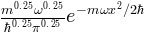

In [16]:
import sympy as sp
from sympy.physics.quantum.constants import hbar
sp.init_printing()

m, w = sp.symbols('m omega', real=True, positive=True)
x, t = sp.symbols('x t')

#setup psi_0
psi_0 = ((m*w)/(sp.pi*hbar))**(1/4)*sp.exp(-m*w*x**2/(2*hbar))
psi_0

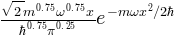

In [17]:
#setup psi_1
psi_1 = ((m*w)/(sp.pi*hbar))**(1/4)*sp.sqrt(2*m*w/(hbar))*x*sp.exp(-m*w*x**2/(2*hbar))
psi_1

To get $\langle x \rangle$ and $\langle x^2 \rangle$ we use the following equation:

$$ \langle x \rangle = \int_{-\infty}^{+\infty}\psi_n^* x \psi_n dx $$

with the appropriate operator sandwiched between $\psi^*$ and $\psi$

In [18]:
#conjugate psi_0 psi_1 and get the squared magnitudes

psi_0sq = sp.conjugate(psi_0)*psi_0
psi_1sq = sp.conjugate(psi_1)*psi_1

#expectation values for x
psi_0expectx = sp.integrate(x*psi_0sq, (x, -sp.oo, sp.oo))
psi_1expectx = sp.integrate(x*psi_1sq, (x, -sp.oo, sp.oo))

#expectation values for x^2
psi_0expectx2 = sp.integrate(x**2*psi_0sq, (x, -sp.oo, sp.oo))
psi_1expectx2 = sp.integrate(x**2*psi_1sq, (x, -sp.oo, sp.oo))

In [19]:
psi_0expectx #for psi_0

In [20]:
psi_1expectx #for psi_1

In [21]:
psi_0expectx2 #for psi_0

In [22]:
psi_1expectx2 #for psi_1

We can get $\langle p \rangle$ via this equation:

$$ \langle p \rangle = m \frac{d\langle x \rangle}{dt} $$

In [23]:
# p expectation values...
psi_0expectp = m*sp.diff(psi_0expectx, t)
psi_1expectp = m*sp.diff(psi_1expectx, t)

In [24]:
psi_0expectp #for psi_0

In [25]:
psi_1expectp #for psi_1

We use the momentum operator to get $\langle p \rangle$

$$ \langle p^2 \rangle = \int_{-\infty}^{+\infty}\psi_n^* (-\hbar^2 \frac{\partial^2}{\partial x^2}) \psi_n dx,$$
the middle piece is the momentum operator $\frac{\hbar}{i} \frac{\partial}{\partial x}$ squared

In [26]:
#expectation values for p^2
psi_0expectp2 = -hbar**2*sp.integrate(sp.conjugate(psi_0)*sp.diff(psi_0, x, 2), (x, -sp.oo, sp.oo))
psi_1expectp2 = -hbar**2*sp.integrate(sp.conjugate(psi_1)*sp.diff(psi_1, x, 2), (x, -sp.oo, sp.oo))

In [27]:
psi_0expectp2 #for psi_0

In [28]:
psi_1expectp2 #for psi_1

We need to check the uncertainty principle:

$$ \sigma_p \sigma_x \geq \frac{\hbar}{2}$$ where

$$ \sigma_p = \sqrt{\langle p^2 \rangle - \langle p \rangle^2} $$

$$ \sigma_x = \sqrt{\langle x^2 \rangle - \langle x \rangle^2} $$


In [30]:
#for psi_0
psi_0sigma_p = sp.sqrt(psi_0expectp2 - psi_0expectp**2)
psi_0sigma_x = sp.sqrt(psi_0expectx2 - psi_0expectx**2)
#for psi_1
psi_1sigma_p = sp.sqrt(psi_1expectp2 - psi_1expectp**2)
psi_1sigma_x = sp.sqrt(psi_1expectx2 - psi_1expectx**2)

In [31]:
#for psi_0
psi_osigmaprod = psi_0sigma_p*psi_0sigma_x

#for psi_1
psi_1sigmaprod = psi_1sigma_p*psi_1sigma_x

In [32]:
psi_osigmaprod

In [33]:
psi_1sigmaprod

The uncertainty principle is satisfied for $\psi_0$ (just barely) and $\psi_1$

Since $T = \frac{p^2}{2m}$ we can say that $\langle T \rangle = \frac{\langle p^2 \rangle}{2m} $

and since $V = \frac{1}{2} k x^2$ where $k = \omega^2 m$ we can say that  $\langle V \rangle = \frac{1}{2}m \omega^2 \langle x ^2 \rangle$

In [42]:
#expectation values of T

psi_0expectT = (1/(2*m))*psi_0expectp2
psi_1expectT = (1/(2*m))*psi_1expectp2

In [43]:
psi_0expectT

In [44]:
psi_1expectT

In [45]:
#expectation values of V
psi_0expectV = (1/2)*m*w**2*psi_0expectx2
psi_1expectV = (1/2)*m*w**2*psi_1expectx2

In [46]:
psi_0expectV

In [47]:
psi_1expectV

We expect these values to sum to the expectation value of the total energy, $\langle H \rangle$.

We can calculate $\langle H \rangle$ with:

$$ \langle H \rangle = \int_{-\infty}^{+\infty}\psi_n^* (\frac{-\hbar^2}{2m} \frac{\partial^2}{\partial x^2} + \frac{1}{2}m \omega^2 x^2) \psi_n dx,$$
the middle piece is the Hamiltonian operator $\frac{-\hbar^2}{2m} \frac{\partial^2}{\partial x^2} + V(x)$ 

In [49]:
psi_0Totalenergy =  sp.integrate(sp.conjugate(psi_0)*(((-hbar**2)/(2*m))*sp.diff(psi_0, x, 2) + (1/2)*m*w**2*x**2*psi_0), (x, -sp.oo, sp.oo))
psi_1Totalenergy =  sp.integrate(sp.conjugate(psi_1)*(((-hbar**2)/(2*m))*sp.diff(psi_1, x, 2) + (1/2)*m*w**2*x**2*psi_1), (x, -sp.oo, sp.oo))

In [50]:
psi_0Totalenergy

In [51]:
psi_1Totalenergy

Lastly we can compute the sums of our T and V expectation values for $\psi_0$ and $\psi_1$

In [52]:
psi_oSum = psi_0expectV + psi_0expectT
psi_1Sum = psi_1expectV + psi_1expectT

In [56]:
sp.simplify(psi_oSum)

In [57]:
sp.simplify(psi_1Sum)

Clearly, we have agreement between then sums and the explicit integral. So we can conclude:

$$ \langle H \rangle = \langle T \rangle + \langle V \rangle  = \frac{\langle p^2 \rangle}{2m} + \frac{1}{2}m \omega^2 \langle x^2 \rangle$$

----

## Portfolio references
* Problem 1.3, 1.5, 1.9, 1.17, 2.4
## Index terms
* uncertainty principle
* Schrodinger equation
* expectation value
* standard deviation
* momentum operator
* Hamiltonian operator
* $\langle T \rangle$ $\langle V \rangle$ for the Harmonic Oscillator
## Book references
* eq 2.59 and 2.62 on pages 16 and 17, equation 2.35 on page 34
## External references